# A Machine Learning Approach for Thyroid Diseases Diagnosis

# Data Exploration and Preprocessing:
    1.Describe the dataset and its features.
    2.Perform data cleaning tasks, including handling missing values, outliers, and inconsistencies.
    3.Conduct exploratory data analysis (EDA) to gain insights into the dataset's characteristics, distributions, and                 relationships.
     3.Visualize the data using appropriate plots and charts to aid in understanding the dataset.

In [193]:
#Importing neccesary libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

# loading  and Describing the Dataset

In [194]:

#loading data set 
df= pd.read_csv('hypothyroid.csv')
pd.options.display.max_columns = None

#Descrption of dataset cloumns 
df.info()# provide a description Ifno about records ,number of features ,datatype of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [195]:
#geting the first 5 columns of our data set 
df.head() 

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [196]:
df.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

# Handling Duplicates and  missing values 

In [197]:
#chekng no.of duplicates 

df.duplicated().sum()

61

In [198]:
#remoing duplicates 
df.drop_duplicates(keep = False, inplace = True)
print ('number of duplicates after applying duplicates removing',df.duplicated().sum())

number of duplicates after applying duplicates removing 0


In [199]:
#replace the unpresented values with NAN TO identify missing values
df=df.replace({"?":np.NAN})


In [200]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,P
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,NaN,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,NaN,other,P
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,NaN,SVI,P


# Note :after checking our dataset we found that column ["TBG"]all null values  

In [201]:
#remove columns with complete null values
del df["TBG"]

checking data after nulls identification

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3678 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3677 non-null   object
 1   sex                        3530 non-null   object
 2   on thyroxine               3678 non-null   object
 3   query on thyroxine         3678 non-null   object
 4   on antithyroid medication  3678 non-null   object
 5   sick                       3678 non-null   object
 6   pregnant                   3678 non-null   object
 7   thyroid surgery            3678 non-null   object
 8   I131 treatment             3678 non-null   object
 9   query hypothyroid          3678 non-null   object
 10  query hyperthyroid         3678 non-null   object
 11  lithium                    3678 non-null   object
 12  goitre                     3678 non-null   object
 13  tumor                      3678 non-null   object
 14  hypopituitary

# Droping missing values 

In [203]:
#checking null values
print('number of nulls ',df.isnull().sum())

number of nulls  age                            1
sex                          148
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          277
T3 measured                    0
T3                           677
TT4 measured                   0
TT4                          139
T4U measured                   0
T4U                          295
FTI measured                   0
FTI                          293
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64


In [204]:
df.dropna(inplace=True)
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64

# Handling inappropriate datatypes 

In [205]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
       df[i] = pd.to_numeric(df[i])
    

In [206]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2641 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2641 non-null   int64  
 1   sex                        2641 non-null   object 
 2   on thyroxine               2641 non-null   object 
 3   query on thyroxine         2641 non-null   object 
 4   on antithyroid medication  2641 non-null   object 
 5   sick                       2641 non-null   object 
 6   pregnant                   2641 non-null   object 
 7   thyroid surgery            2641 non-null   object 
 8   I131 treatment             2641 non-null   object 
 9   query hypothyroid          2641 non-null   object 
 10  query hyperthyroid         2641 non-null   object 
 11  lithium                    2641 non-null   object 
 12  goitre                     2641 non-null   object 
 13  tumor                      2641 non-null   object 
 1

# Handling  and visulize outliers using IQR  FOR Nummerical values

<Axes: >

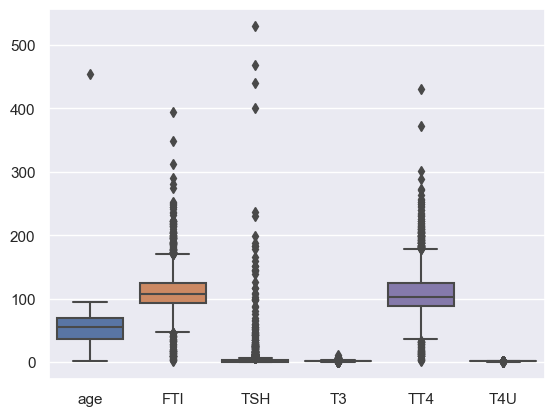

In [207]:
#detecting outliers using boxplot 
import seaborn as sns

sns.boxplot(df[cols])

In [208]:
df[cols].describe() #this provides a statstical descrption for the nummerical data

,age,FTI,TSH,T3,TT4,T4U
count,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000
mean,53.106020,109.463499,5.038656,2.001151,107.882810,0.995624
std,20.356522,32.468958,23.983734,0.824126,35.463019,0.196517
min,1.000000,2.000000,0.005000,0.050000,2.000000,0.250000
25%,37.000000,93.000000,0.500000,1.500000,88.000000,0.870000
50%,55.000000,107.000000,1.300000,2.000000,103.000000,0.980000
75%,69.000000,124.000000,2.600000,2.300000,124.000000,1.090000
max,455.000000,395.000000,530.000000,10.600000,430.000000,2.120000


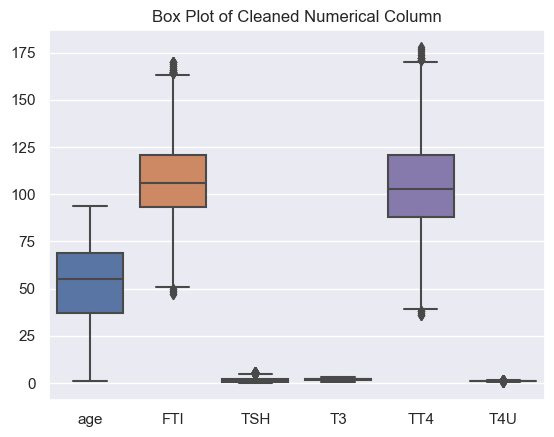

In [209]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)]

# Remove outliers
df[cols] = df[cols][(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]

# Visualize the cleaned data 
sns.boxplot(df[cols])
plt.title('Box Plot of Cleaned Numerical Column')
plt.show()

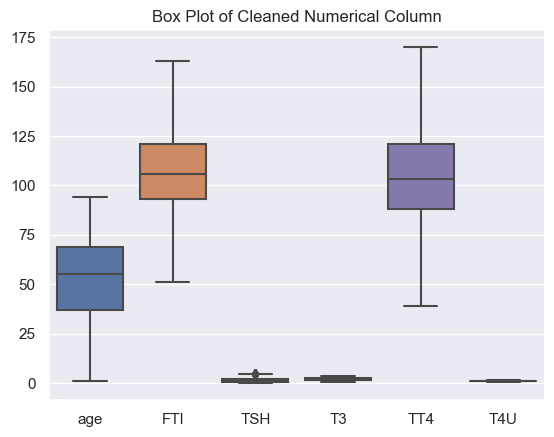

In [210]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)]

# Remove outliers
df[cols] = df[cols][(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]

# Visualize the cleaned data (optional)
sns.boxplot(df[cols])
plt.title('Box Plot of Cleaned Numerical Column')
plt.show()


In [211]:
df[cols].value_counts()

age   FTI    TSH   T3   TT4    T4U 
1.0   111.0  1.50  1.4  82.0   0.74    1
64.0  131.0  0.73  2.0  152.0  1.15    1
65.0  91.0   3.90  1.6  103.0  1.13    1
      90.0   2.70  2.3  100.0  1.11    1
             0.25  2.2  81.0   0.90    1
                                      ..
45.0  106.0  1.30  2.3  88.0   0.84    1
             1.20  2.7  120.0  1.13    1
      102.0  0.90  2.6  92.0   0.90    1
      99.0   3.20  2.0  73.0   0.74    1
94.0  114.0  1.90  1.3  119.0  1.04    1
Name: count, Length: 2002, dtype: int64

In [212]:
#IMPUTATION OF MISSING VALUES WITH MEAN'faeture engeneering teginque'
df.loc[:, cols] = df[cols].fillna(df[cols].mean())

# Data visualization  ,EDA

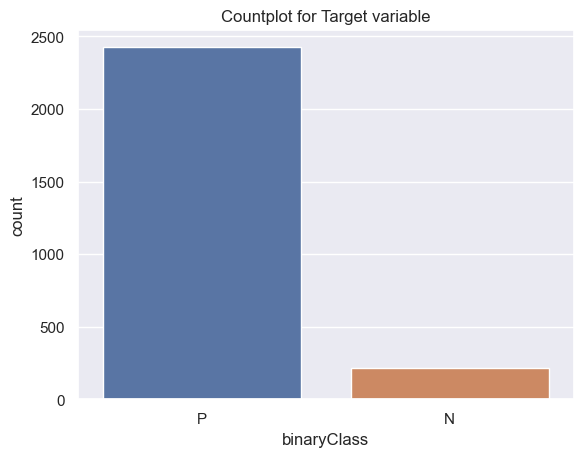

In [213]:
sns.countplot(x='binaryClass',data=df)
plt.title("Countplot for Target variable");


# inference
Most of our targeted data are diagnosed with thyroid diseases

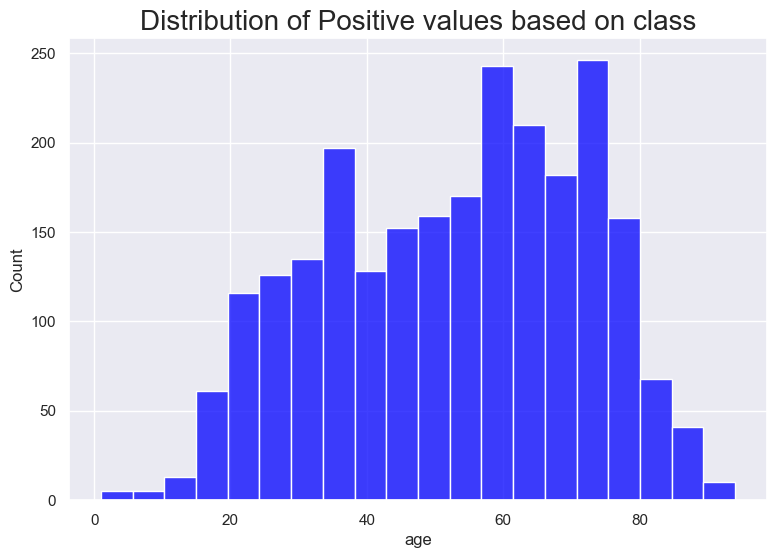

In [214]:
#conducting the distrbution of the postive values of the binary class within the ages values
pov_df= df[df.binaryClass =='P']

plt.figure(figsize=(9,6))
sns.histplot(x='age',data= pov_df,color='blue')
plt.title("Distribution of Positive values based on class",{'fontsize':20});

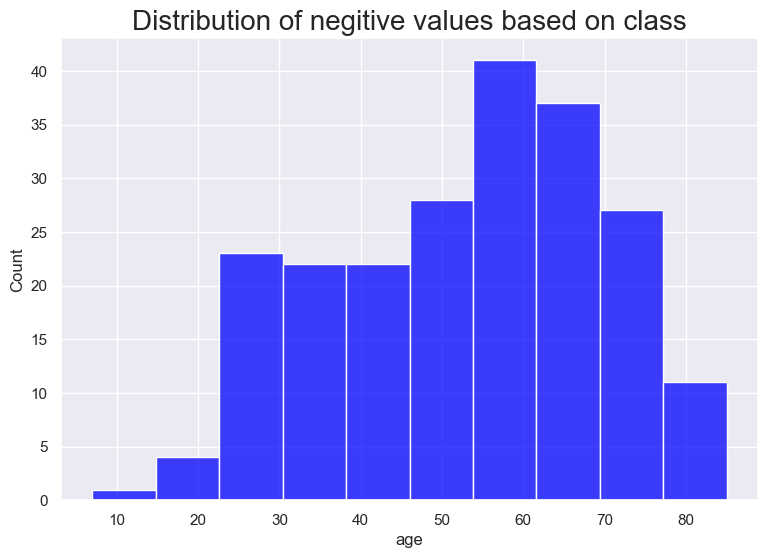

In [215]:
#conducting the distrbution of the negative values of the binary class within the ages values
NEG_df= df[df.binaryClass =='N']
plt.figure(figsize=(9,6))
sns.histplot(x='age',data= NEG_df,color='blue')
plt.title("Distribution of negitive values based on class",{'fontsize':20});

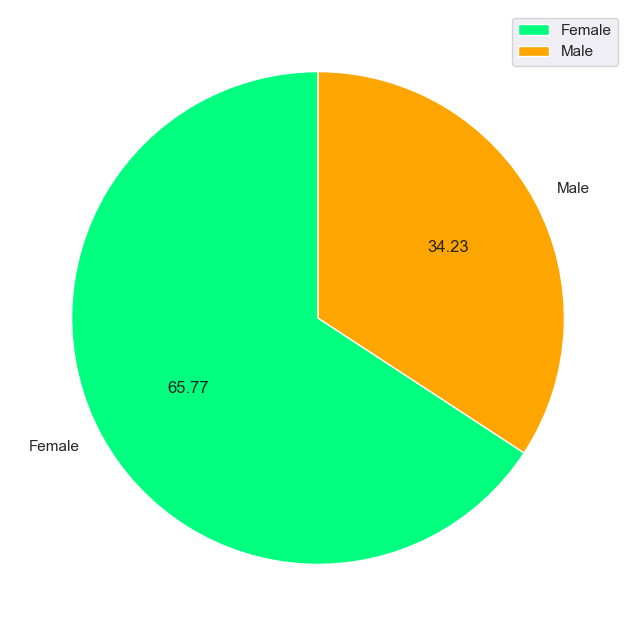

In [216]:
plt.figure(figsize=(10,8))
plt.pie(x=pov_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

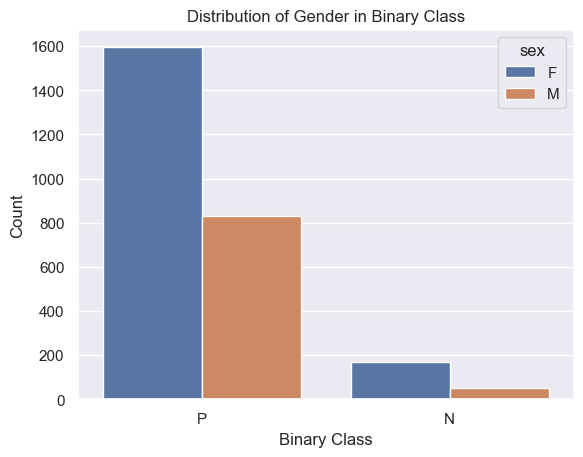

In [217]:
sns.countplot(x="binaryClass", hue="sex", data=df)
plt.xlabel("Binary Class")
plt.ylabel("Count")
plt.title("Distribution of Gender in Binary Class")
plt.show()

# Inference :
Female patients who has disease is greater than male patients.

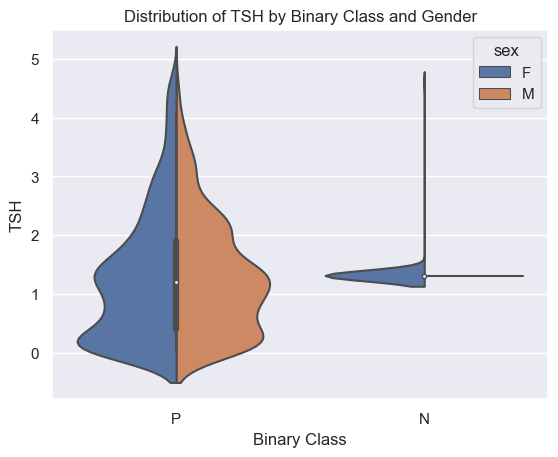

In [218]:
sns.violinplot(x="binaryClass", y="TSH", hue="sex", split=True, data=df)
plt.xlabel("Binary Class")
plt.ylabel("TSH")
plt.title("Distribution of TSH by Binary Class and Gender")
plt.show()

# Inference 
the levels of TSH hermon is higher in females than males
    

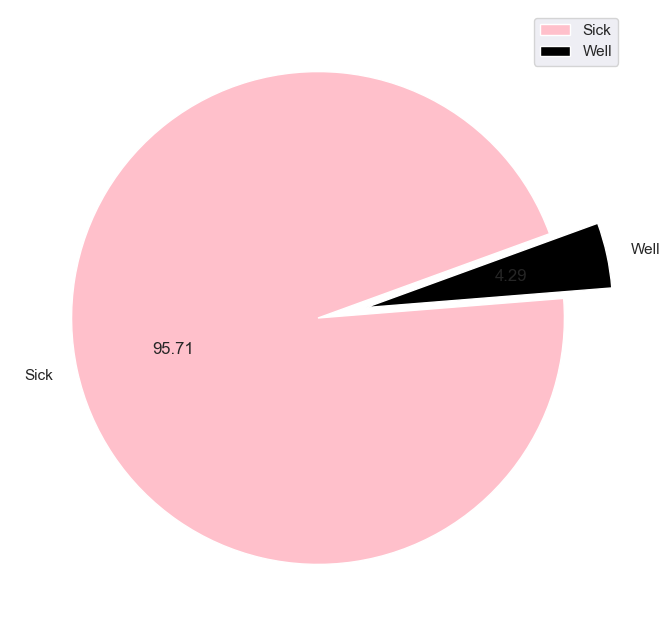

In [219]:
plt.figure(figsize=(8,8))
plt.pie(x=pov_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['pink','black'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

In [220]:
pip install imblearn-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imblearn-learn (from versions: none)
ERROR: No matching distribution found for imblearn-learn


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

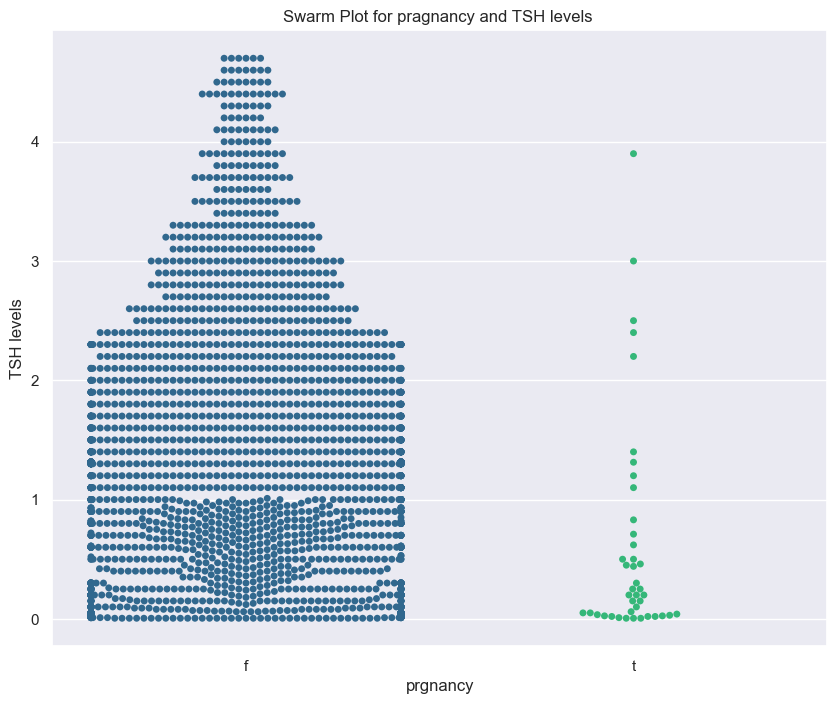

In [222]:

plt.figure(figsize=(10, 8))
 
# Using Seaborn to create a swarm plot
sns.swarmplot(x="pregnant", y="TSH", data=df, palette='viridis')
 
plt.title('Swarm Plot for pragnancy and TSH levels ')
plt.xlabel('prgnancy')
plt.ylabel('TSH levels')
plt.show()

# inference:
TSH level less in prgnaancy 

<Figure size 1000x600 with 0 Axes>

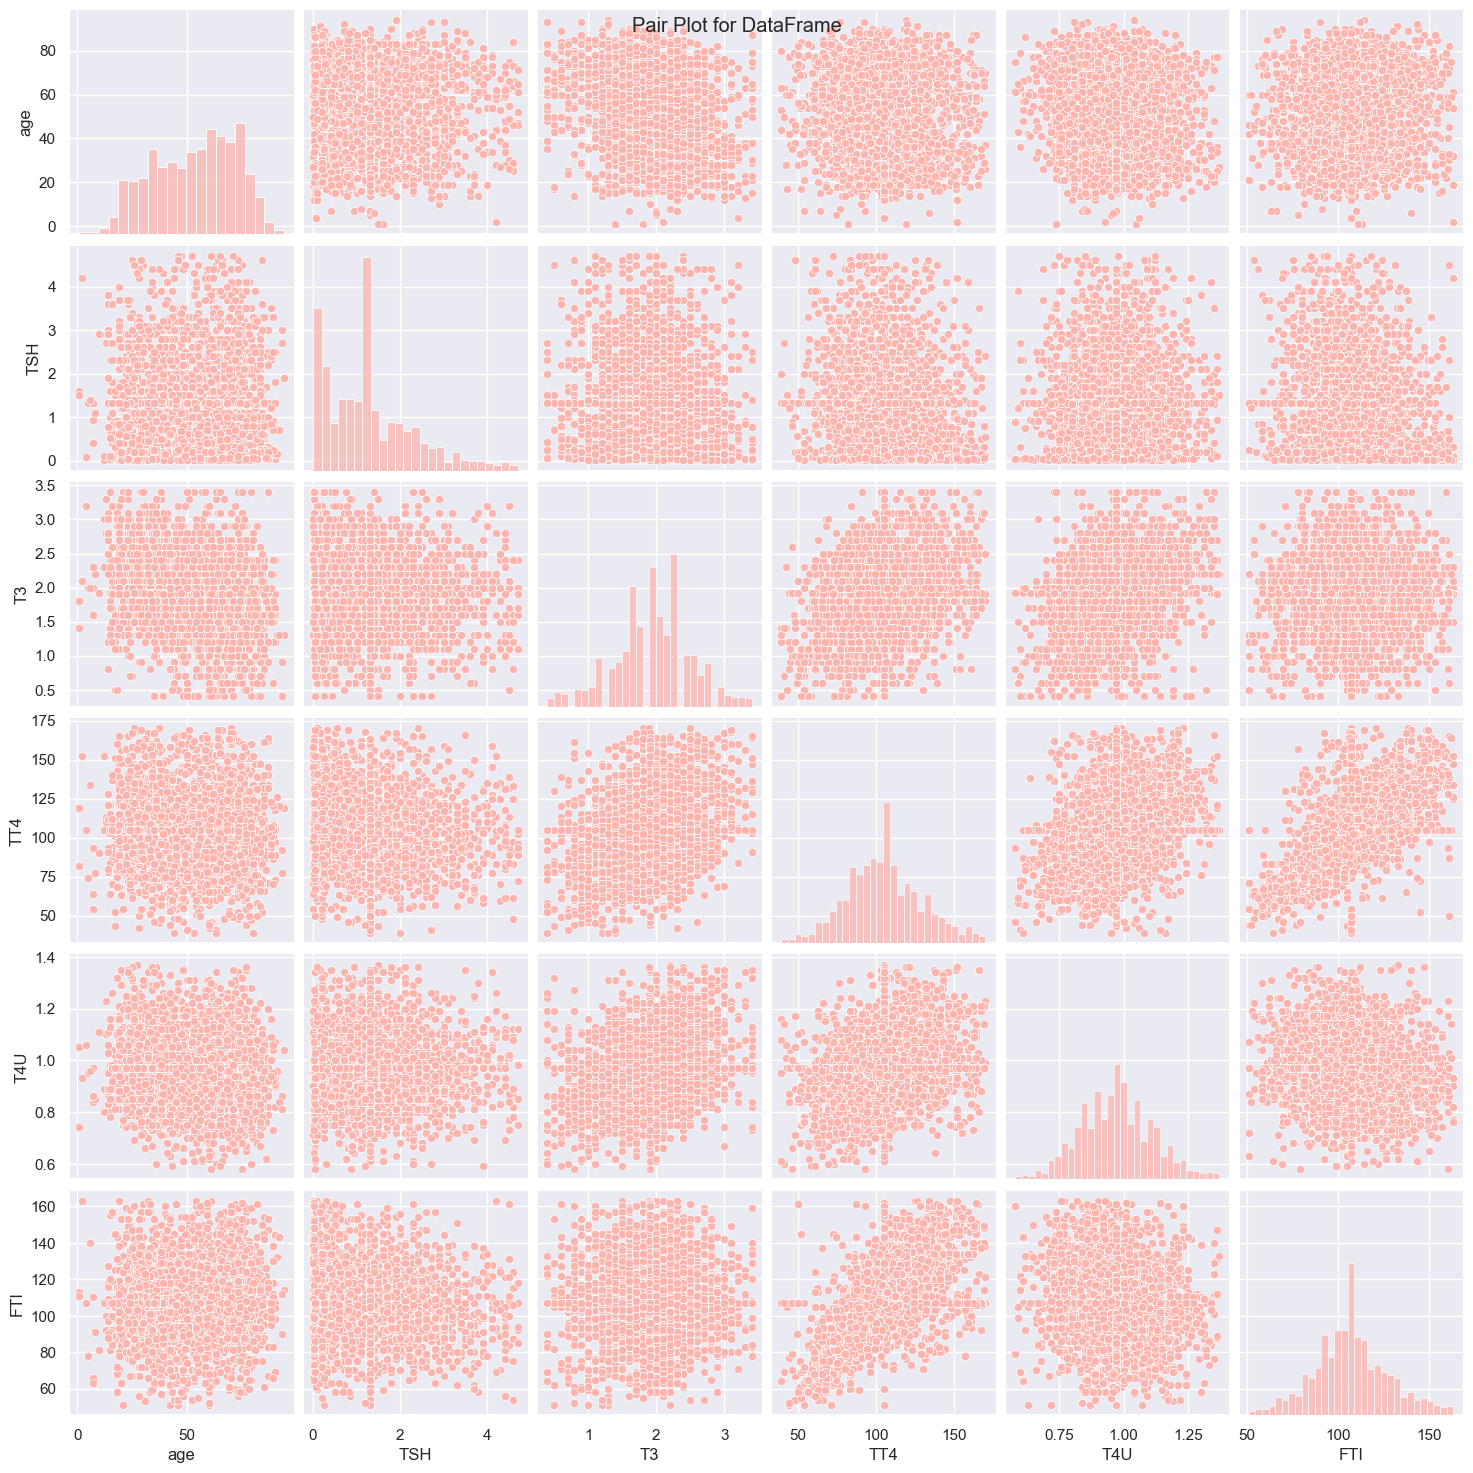

In [223]:
 #Set the color palette
sns.set_palette("Pastel1")
 

plt.figure(figsize=(10, 6))
 
# create a pair plot with the specified color palette
sns.pairplot(df)
 
plt.suptitle('Pair Plot for DataFrame')
plt.show()

# Feature Engineering



In [224]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.300000,t,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.720000,t,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.200000,t,0.6,t,80.0,t,0.70,t,115.0,f,SVI,P
8,66.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.600000,t,2.2,t,123.0,t,0.93,t,132.0,f,SVI,P
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.400000,t,1.6,t,83.0,t,0.89,t,93.0,f,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.312992,t,2.7,t,108.0,t,1.11,t,97.0,f,other,N
3768,68.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.000000,t,2.1,t,124.0,t,1.08,t,114.0,f,SVI,P
3769,74.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,1.312992,t,1.8,t,112.0,t,1.07,t,105.0,f,other,P
3770,72.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.700000,t,2.0,t,82.0,t,0.94,t,87.0,f,SVI,P


## Encoding categorical data as nummerical values 

In [225]:
df = pd.get_dummies(df, columns=['referral source'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2641 entries, 0 to 3771
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2641 non-null   float64
 1   sex                        2641 non-null   object 
 2   on thyroxine               2641 non-null   object 
 3   query on thyroxine         2641 non-null   object 
 4   on antithyroid medication  2641 non-null   object 
 5   sick                       2641 non-null   object 
 6   pregnant                   2641 non-null   object 
 7   thyroid surgery            2641 non-null   object 
 8   I131 treatment             2641 non-null   object 
 9   query hypothyroid          2641 non-null   object 
 10  query hyperthyroid         2641 non-null   object 
 11  lithium                    2641 non-null   object 
 12  goitre                     2641 non-null   object 
 13  tumor                      2641 non-null   object 
 1

In [226]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.300000,t,2.5,t,125.0,t,1.14,t,109.0,f,P,False,True,False,False,False
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.720000,t,1.2,t,61.0,t,0.87,t,70.0,f,P,False,False,False,True,False
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.200000,t,0.6,t,80.0,t,0.70,t,115.0,f,P,False,False,False,True,False
8,66.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.600000,t,2.2,t,123.0,t,0.93,t,132.0,f,P,False,False,False,True,False
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.400000,t,1.6,t,83.0,t,0.89,t,93.0,f,P,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.312992,t,2.7,t,108.0,t,1.11,t,97.0,f,N,False,False,False,False,True
3768,68.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.000000,t,2.1,t,124.0,t,1.08,t,114.0,f,P,False,False,False,True,False
3769,74.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,1.312992,t,1.8,t,112.0,t,1.07,t,105.0,f,P,False,False,False,False,True
3770,72.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.700000,t,2.0,t,82.0,t,0.94,t,87.0,f,P,False,False,False,True,False


In [227]:
s_encoder = LabelEncoder()#sex
on_thyroencoder= LabelEncoder()#query on thyroxine
si_encoder = LabelEncoder()#sick
preg_encoder = LabelEncoder()#pregnant
th_encoder = LabelEncoder()#thyroid surgery 
treat_encoder = LabelEncoder()#I131 treatment
lith_encoder = LabelEncoder()#lithium
g_encoder= LabelEncoder()#goitre
tu_encoder = LabelEncoder()#tumor column
psych_encoder = LabelEncoder() #psych
hypopit_encoder = LabelEncoder()#hypopituitary
onhyper_encoder=  LabelEncoder()# query hyperthyroid
binary_encoder = LabelEncoder()#binary class


In [228]:
df['sex'] = s_encoder.fit_transform(df.sex)
df['I131 treatment'] = treat_encoder.fit_transform(df['I131 treatment'])
df['sick'] = si_encoder.fit_transform(df.sick)
df['pregnant'] = preg_encoder.fit_transform(df.pregnant)
df['thyroid surgery'] = th_encoder.fit_transform(df['thyroid surgery'])
df['lithium'] = lith_encoder.fit_transform(df['lithium'])
df['goitre'] = g_encoder.fit_transform(df['goitre'])
df['tumor'] = tu_encoder.fit_transform(df['tumor'])
df['query on thyroxine'] = on_thyroencoder.fit_transform(df['query on thyroxine'])
df['query hyperthyroid'] = onhyper_encoder.fit_transform(df['query hyperthyroid'])
df['hypopituitary'] = hypopit_encoder.fit_transform(df['hypopituitary'])
df['psych'] = psych_encoder.fit_transform(df['psych'])
df['binaryClass'] =binary_encoder.fit_transform(df['binaryClass'])

# Removing unncessary or redundant columns 
NOTE : we  removed column that will not help inin classification and the measured columns of the original hormones expressions column '
     to enhance the discriminative power and efficiency of the model."

In [229]:
#deleting resundant columns  and unncessary column
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured',
         'FTI measured','TBG measured','on thyroxine','on antithyroid medication','query hypothyroid'],axis=1,inplace=True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2641 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    2641 non-null   float64
 1   sex                    2641 non-null   int32  
 2   query on thyroxine     2641 non-null   int32  
 3   sick                   2641 non-null   int32  
 4   pregnant               2641 non-null   int32  
 5   thyroid surgery        2641 non-null   int32  
 6   I131 treatment         2641 non-null   int32  
 7   query hyperthyroid     2641 non-null   int32  
 8   lithium                2641 non-null   int32  
 9   goitre                 2641 non-null   int32  
 10  tumor                  2641 non-null   int32  
 11  hypopituitary          2641 non-null   int32  
 12  psych                  2641 non-null   int32  
 13  TSH                    2641 non-null   float64
 14  T3                     2641 non-null   float64
 15  TT4      

## New features creation 

1. composite health indicator feature

2.hermons levels ratio

In [231]:
#creating a composite health indacator feature
df['composite_health_indicator'] = df['sick'] + df['pregnant'] + df['thyroid surgery'] + df['I131 treatment']

df['T3_T4_ratio'] = df['T3'] / df['TT4']
df['TSH_TT4_ratio'] = df['TSH'] / df['TT4']
df['T4U_FTI_ratio'] = df['T4U'] / df['FTI']

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2641 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         2641 non-null   float64
 1   sex                         2641 non-null   int32  
 2   query on thyroxine          2641 non-null   int32  
 3   sick                        2641 non-null   int32  
 4   pregnant                    2641 non-null   int32  
 5   thyroid surgery             2641 non-null   int32  
 6   I131 treatment              2641 non-null   int32  
 7   query hyperthyroid          2641 non-null   int32  
 8   lithium                     2641 non-null   int32  
 9   goitre                      2641 non-null   int32  
 10  tumor                       2641 non-null   int32  
 11  hypopituitary               2641 non-null   int32  
 12  psych                       2641 non-null   int32  
 13  TSH                         2641 non-n

In [233]:
df

,age,sex,query on thyroxine,sick,pregnant,thyroid surgery,I131 treatment,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other,composite_health_indicator,T3_T4_ratio,TSH_TT4_ratio,T4U_FTI_ratio
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,1.300000,2.5,125.0,1.14,109.0,1,False,True,False,False,False,0,0.020000,0.010400,0.010459
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0.720000,1.2,61.0,0.87,70.0,1,False,False,False,True,False,0,0.019672,0.011803,0.012429
7,80.0,0,0,0,0,0,0,0,0,0,0,0,0,2.200000,0.6,80.0,0.70,115.0,1,False,False,False,True,False,0,0.007500,0.027500,0.006087
8,66.0,0,0,0,0,0,0,0,0,0,1,0,0,0.600000,2.2,123.0,0.93,132.0,1,False,False,False,True,False,0,0.017886,0.004878,0.007045
9,68.0,1,0,0,0,0,0,0,0,0,0,0,0,2.400000,1.6,83.0,0.89,93.0,1,False,False,False,True,False,0,0.019277,0.028916,0.009570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19.0,0,0,0,0,0,0,0,0,0,0,0,0,1.312992,2.7,108.0,1.11,97.0,0,False,False,False,False,True,0,0.025000,0.012157,0.011443
3768,68.0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,2.1,124.0,1.08,114.0,1,False,False,False,True,False,0,0.016935,0.008065,0.009474
3769,74.0,0,0,0,0,0,0,1,0,0,0,0,0,1.312992,1.8,112.0,1.07,105.0,1,False,False,False,False,True,0,0.016071,0.011723,0.010190
3770,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0.700000,2.0,82.0,0.94,87.0,1,False,False,False,True,False,0,0.024390,0.008537,0.010805


# Machine Learning Model Development
Generating x and y variables 

Note :we dropped the referral source as  source  of data will not indicate for any prediction

In [234]:
#introducing x and y variables

X=df.drop(['referral source_STMW','referral source_SVHC','referral source_SVHD','referral source_SVI', 'referral source_other',
         'binaryClass'] , axis=1) 
y=df['binaryClass'] 

### model variables spliting 

In [235]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [236]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1848, 22)
(793, 22)
(1848,)
(793,)


## scalling nummerical values 

In [237]:
scalr = MinMaxScaler()
X_train.TT4 = scalr.fit_transform(X_train[['TT4']])
X_train.age = scalr.fit_transform(X_train[['age']])
X_train.FTI = scalr.fit_transform(X_train[['FTI']])
X_train.TSH = scalr.fit_transform(X_train[['TSH']])
X_train.T4U = scalr.fit_transform(X_train[['T4U']])
X_train.T3_T4_ratio = scalr.fit_transform(X_train[['T3_T4_ratio']])
X_train.TSH_TT4_ratio = scalr.fit_transform(X_train[['TSH_TT4_ratio']]) 
X_train.T4U_FTI_ratio = scalr.fit_transform(X_train[['T4U_FTI_ratio']]) 

In [238]:
X_test.TT4 = scalr.fit_transform(X_test[['TT4']])
X_test.age = scalr.fit_transform(X_test[['age']])
X_test.FTI = scalr.fit_transform(X_test[['FTI']])
X_test.TSH = scalr.fit_transform(X_test[['TSH']])
X_test.T4U = scalr.fit_transform(X_test[['T4U']])
X_test.T3_T4_ratio = scalr.fit_transform(X_test[['T3_T4_ratio']])
X_test.TSH_TT4_ratio = scalr.fit_transform(X_test[['TSH_TT4_ratio']]) 
X_test.T4U_FTI_ratio = scalr.fit_transform(X_test[['T4U_FTI_ratio']]) 

## Handling unbalanced data 

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [240]:
smote_factor=SMOTE(random_state=11)
x_smote, y_smote = smote_factor.fit_resample(X_train, y_train)
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (1848, 22)
Shape after the Oversampling :  (3386, 22)


In [243]:
x_smote_test, y_smote_test = smote_factor.fit_resample(X_test,y_test)
print("Shape before the Oversampling : ",X_test.shape)
print("Shape after the Oversampling : ",x_smote_test.shape)

Shape before the Oversampling :  (793, 22)
Shape after the Oversampling :  (1464, 22)


# Training models and evaluation
we used 5 models and evaluate their performance based on classification report and accuracy test to identify the best model 
for our data set 

In [244]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest',
    KNeighborsClassifier(n_neighbors=5):'KNN',
    DecisionTreeClassifier():'Decision Tree'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
      print(f"Accuracy Score for {name} is : ",model.score(x_smote_test, y_smote_test)*100,"%")


Accuracy Score for Logistic Regression is :  76.36612021857924 %
Accuracy Score for Support Vector Machine is :  79.84972677595628 %
Accuracy Score for Random Forest is :  95.0136612021858 %
Accuracy Score for KNN is :  81.4207650273224 %
Accuracy Score for Decision Tree is :  94.53551912568307 %


In [56]:
for model,name in models.items():
    y_pred = model.predict(x_smote_test)
    print(f"Classification  Report of  performance  for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_smote_test,y_pred))
    print("----------------------------------------------------------")

Classification  Report of  performance  for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       732
           1       0.75      0.80      0.77       732

    accuracy                           0.76      1464
   macro avg       0.76      0.76      0.76      1464
weighted avg       0.76      0.76      0.76      1464

----------------------------------------------------------
Classification  Report of  performance  for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       732
           1       0.81      0.78      0.79       732

    accuracy                           0.80      1464
   macro avg       0.80      0.80      0.80      1464
weighted avg       0.80      0.80      0.80      1464

--------------------------------------

# inference :
the Random Forest model appears to have the highest overall performance. It achieves the highest precision, recall, and F1-score for both classes (0 and 1), as well as the highest accuracy among all the models evaluated. Therefore, 
     the Random Forest model seems to be te best choice for our  dataset

# training  data on Random forest ML  model 

In [248]:

rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)

RandomForestClassifier()

# AUC/ROC performance evaluation  Test 

In [257]:
from sklearn.metrics import roc_curve
y_probs = rf.predict_proba(x_smote_test)
y_probs 


array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.83, 0.17],
       [0.33, 0.67],
       [0.69, 0.31]])

In [258]:
y_probs_postive = y_probs[ :, 1]
y_probs_postive[:10]

array([1.  , 1.  , 1.  , 0.97, 0.97, 1.  , 0.9 , 1.  , 0.98, 1.  ])

In [259]:
#calculate fpr and tpr and threshold
fpr,tpr,thresholds = roc_curve(y_smote_test,y_probs_postive) 

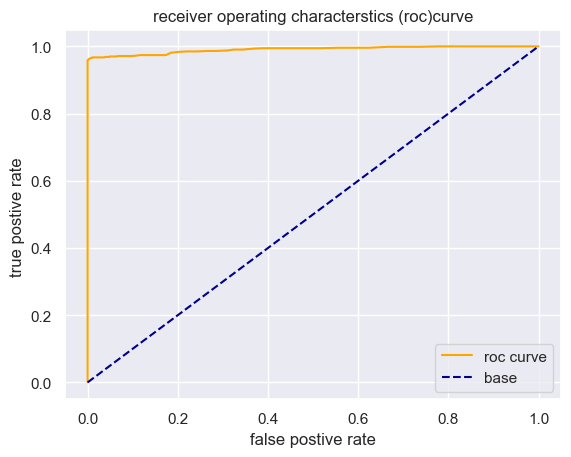

In [260]:
#VISULIZING the test 
def plot_roc_AUC(fpr,tpr):
    plt.plot(fpr,tpr, color='orange',label='roc curve') 
    #plot line with no predictive power (baseline )
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='base')
    #customization of the plot
    plt.xlabel('false postive rate')
    plt.ylabel('true postive rate ')
    plt.title('receiver operating characterstics (roc)curve')
    plt.legend()
    plt.show()
plot_roc_AUC(fpr,tpr)

In [261]:
from sklearn.metrics import roc_auc_score
roc_auc_score( y_smote_test,y_probs_postive)

0.9907861536623965

##### Discovering features importance for random forest model

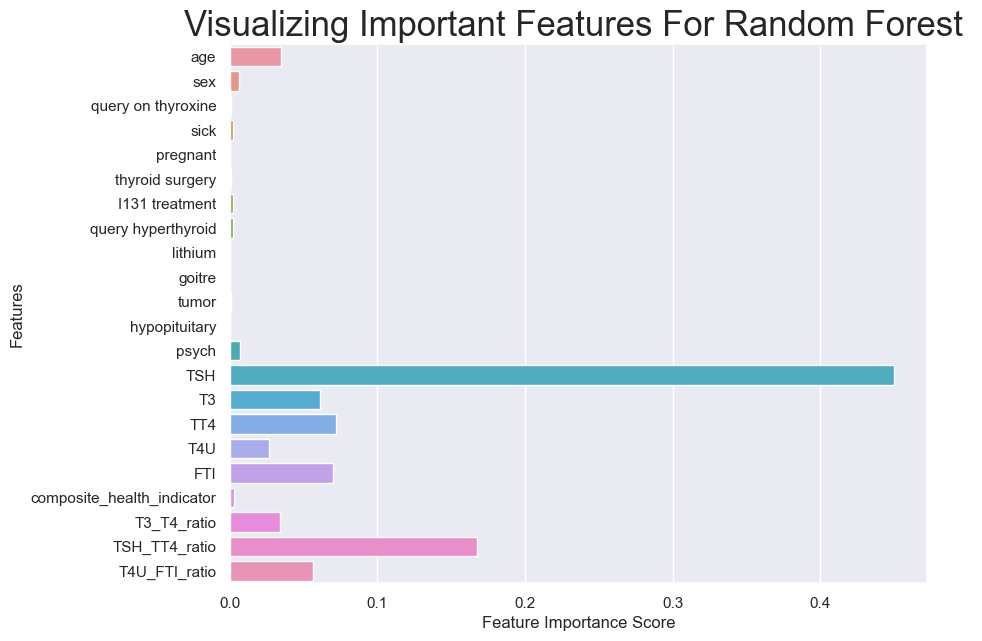

In [263]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':25})
plt.show();

# adjusting hyperparameters to optimize performance.

### Discovering paramters of the random forest model

In [266]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Getting best hyperparamters tunning using GridSearchCV ,RandomizedSearchCV functions 

In [267]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

In [268]:
# Define the parameter grid
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
}

# first  identify paramters tunning based on GridSearchCV

In [85]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_smote,y_smote) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


### retrain model 

In [276]:
model_random = RandomForestClassifier(max_depth=9, 
                                      max_features=None, 
                                      max_leaf_nodes=9, 
                                      n_estimators=150) 
model_random.fit(x_smote,y_smote) 
y_pred = model_random .predict(x_smote_test) 
print(classification_report(y_pred, y_smote_test)) 
print(f"Accuracy Score for randomforest model after paramters tunning is : ",model_random.score(x_smote_test, y_smote_test)*100,"%")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       760
           1       0.96      1.00      0.98       704

    accuracy                           0.98      1464
   macro avg       0.98      0.98      0.98      1464
weighted avg       0.98      0.98      0.98      1464

Accuracy Score for randomforest model after paramters tunning is :  98.08743169398907 %


## second identify paramters tunning based o on RandomizedSearchCV function 

In [72]:
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(x_smote,y_smote) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
                       n_estimators=50)


### retrain model 


In [283]:
model_random = RandomForestClassifier(max_depth=3, 
                                      max_features=None, 
                                      max_leaf_nodes=6, 
                                      n_estimators=50) 
model_random.fit(x_smote,y_smote) 
y_pred = model_random .predict(x_smote_test) 
print(classification_report(y_pred, y_smote_test)) 
print(f"Accuracy Score for randomforest model after paramters tunning is : ",model_random.score(x_smote_test, y_smote_test)*100,"%")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       762
           1       0.96      1.00      0.98       702

    accuracy                           0.98      1464
   macro avg       0.98      0.98      0.98      1464
weighted avg       0.98      0.98      0.98      1464

Accuracy Score for randomforest model after paramters tunning is :  97.95081967213115 %


# inference 
best hyper paramtr tynning for our model with accuracy =98.08743169398907 %
is (max_depth=3, max_features=None,  max_leaf_nodes=6, n_estimators=25)

# Model Deployment on app 'GUI'

In [80]:
!pip install streamlit

## importing file that vontain our model for the following step 'app implementation'

In [281]:
import pickle
filename ='savemodel_1.sav'
pickle.dump(model_random , open(filename, 'wb'))

In [282]:
load_model = pickle.load(open(filename , 'rb'))

In [147]:
load_model.predict([(0.95,0,0,0,0,0,0,0,0,0,0,0,0,0.041534,1.5,0.709924,0.333333,0.910714,0,0.148185,0.025681,0.077880)])

array([1], dtype=int64)